In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Choose to plot gene-count-filtered/unfiltered data
filtered = False

if filtered:
    count_matrix_filename = "count_matrix_filtered.tsv"
    normalized_vst_counts_filename = "normalized_vst_counts_filtered.tsv"
    normalized_vst_counts_excluded_filename = 'normalized_vst_counts_excluded.tsv'
else:
    count_matrix_filename = "count_matrix.tsv"
    normalized_vst_counts_filename = "normalized_vst_counts.tsv"

In [3]:
# Import normalized data and info table
count_matrix = pd.read_csv('counts/'+count_matrix_filename, sep='\t', index_col=0)
normalized_data = pd.read_csv('normalized_counts/'+normalized_vst_counts_filename, sep='\t')
info_table = pd.read_csv('counts/info_table.tsv', sep='\t', 
                         names=['patient_id', 'study', 'cohort'], header=0)

if filtered:
    normalized_data_excluded = pd.read_csv('normalized_counts/'+normalized_vst_counts_excluded_filename,
                                           sep='\t')
else:
    normalized_data_excluded = None

In [4]:
# Choose to plot data with excluded 0 values
exclude_0s = True

if exclude_0s:
    count_matrix = count_matrix[count_matrix > 0]
    normalized_data = normalized_data[normalized_data > normalized_data.min()]

In [5]:
# Compare counts data to normalized and data
count_matrix.describe()

,IMMU_BC1_0164,IMMU_BC1_0191,IMMU_BC1_0213,IMMU_BC1_0248,IMMU_BC1_0297,IMMU_BC1_0319,IMMU_BC1_0327,IMMU_BC1_0327_02,IMMU_BC1_0329,IMMU_BC1_0422,...,SYNG_BC1_1594,SYNG_BC1_1595,SYNG_BC1_1596,SYNG_BC1_1597,SYNG_BC1_1599,SYNG_BC1_1600,SYNG_BC1_1601,SYNG_BC1_1601_02,SYNG_BC1_1602,SYNG_BC1_1603
count,3.837900e+04,3.410700e+04,32087.000000,3.411200e+04,3.499700e+04,3.752800e+04,3.724600e+04,3.327000e+04,3.422200e+04,3.791200e+04,...,34220.000000,3.423500e+04,3.495400e+04,3.161100e+04,3.014500e+04,2.956900e+04,3.047700e+04,3.345200e+04,3.500000e+04,3.374100e+04
mean,2.281029e+03,1.620527e+03,717.963007,1.885530e+03,9.784901e+02,1.615447e+03,1.268441e+03,1.333038e+03,1.035358e+03,1.282929e+03,...,972.603039,1.197429e+03,1.438194e+03,1.043608e+03,1.046847e+03,1.286547e+03,1.321473e+03,1.571523e+03,2.064766e+03,1.136695e+03
std,1.601008e+04,2.297858e+04,5397.191718,1.459990e+04,1.004353e+04,1.960647e+04,1.227473e+04,1.021316e+04,1.064392e+04,1.065988e+04,...,5736.072641,1.002397e+04,1.366087e+04,2.041920e+04,3.103210e+04,2.311319e+04,1.479249e+04,1.953076e+04,1.768564e+04,1.427780e+04
min,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.000000e+00,6.000000e+00,5.000000,7.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,7.000000e+00,6.000000e+00,...,10.000000,1.100000e+01,1.000000e+01,1.200000e+01,1.000000e+01,1.500000e+01,1.700000e+01,1.500000e+01,1.300000e+01,9.000000e+00
50%,6.600000e+01,5.300000e+01,39.000000,6.700000e+01,4.000000e+01,5.700000e+01,5.800000e+01,7.000000e+01,5.500000e+01,5.300000e+01,...,79.000000,8.700000e+01,8.100000e+01,8.800000e+01,5.800000e+01,1.150000e+02,1.230000e+02,1.110000e+02,1.000000e+02,6.700000e+01
75%,1.325000e+03,8.860000e+02,493.000000,1.192000e+03,6.230000e+02,8.870000e+02,8.390000e+02,9.390000e+02,6.840000e+02,8.280000e+02,...,798.250000,9.250000e+02,1.026000e+03,8.225000e+02,4.840000e+02,8.740000e+02,1.013000e+03,1.111000e+03,1.314000e+03,7.650000e+02
max,1.788572e+06,2.191710e+06,604389.000000,1.392848e+06,1.386833e+06,1.998514e+06,1.972935e+06,1.083211e+06,1.221195e+06,1.658442e+06,...,816249.000000,1.638766e+06,2.091196e+06,3.564364e+06,4.351767e+06,3.695166e+06,2.302859e+06,3.200015e+06,2.433506e+06,2.451142e+06


In [6]:
normalized_data.describe()

,IMMU_BC1_0164,IMMU_BC1_0191,IMMU_BC1_0213,IMMU_BC1_0248,IMMU_BC1_0297,IMMU_BC1_0319,IMMU_BC1_0327,IMMU_BC1_0327_02,IMMU_BC1_0329,IMMU_BC1_0422,...,SYNG_BC1_1594,SYNG_BC1_1595,SYNG_BC1_1596,SYNG_BC1_1597,SYNG_BC1_1599,SYNG_BC1_1600,SYNG_BC1_1601,SYNG_BC1_1601_02,SYNG_BC1_1602,SYNG_BC1_1603
count,38379.000000,34107.000000,32087.000000,34112.000000,34997.000000,37528.000000,37246.000000,33270.000000,34222.000000,37912.000000,...,34220.000000,34235.000000,34954.000000,31611.000000,30145.000000,29569.000000,30477.000000,33452.000000,35000.000000,33741.000000
mean,7.202115,7.491318,7.721341,7.477025,7.483649,7.358407,7.390911,7.610945,7.645125,7.336700,...,7.688617,7.667575,7.564014,7.849644,8.007259,8.049624,7.985064,7.753720,7.563394,7.672769
std,2.728479,2.749487,2.701762,2.778392,2.703034,2.681578,2.652566,2.708033,2.670110,2.668693,...,2.584361,2.604091,2.642843,2.590699,2.587591,2.650873,2.618928,2.625568,2.691000,2.650415
min,4.502661,4.595116,4.735039,4.552932,4.651063,4.566468,4.578903,4.597916,4.650560,4.575313,...,4.618264,4.591702,4.568988,4.636512,4.758670,4.643540,4.613274,4.571695,4.534459,4.624845
25%,4.837132,5.058475,5.293026,5.011874,5.112757,4.990242,5.019900,5.184441,5.260524,5.011344,...,5.349056,5.316511,5.201324,5.505413,5.756470,5.666163,5.637499,5.411142,5.208695,5.314622
50%,6.048699,6.434297,6.835880,6.393872,6.468913,6.333086,6.422852,6.716810,6.774929,6.320899,...,6.965055,6.899141,6.677819,7.192808,7.375381,7.541380,7.422299,7.020283,6.643174,6.832693
75%,9.462149,9.831050,10.016481,9.855764,9.785174,9.577667,9.614435,9.935354,9.910740,9.564142,...,9.877836,9.861331,9.801468,10.061822,10.130017,10.199684,10.168730,9.936682,9.803342,9.870998
max,19.780798,21.041773,20.221956,19.985550,20.841695,20.641630,20.741955,20.049893,20.654371,20.457610,...,19.816075,20.591766,20.731523,22.090625,23.214226,22.197692,21.270563,21.371346,20.595256,21.456663


In [7]:
normalized_data.to_csv('brca_normalized_counts_pid.tsv', sep='\t')

In [7]:
# Flatten normalized dataframe for distribution
normalized_data_flat = normalized_data.to_numpy().flatten()

[]

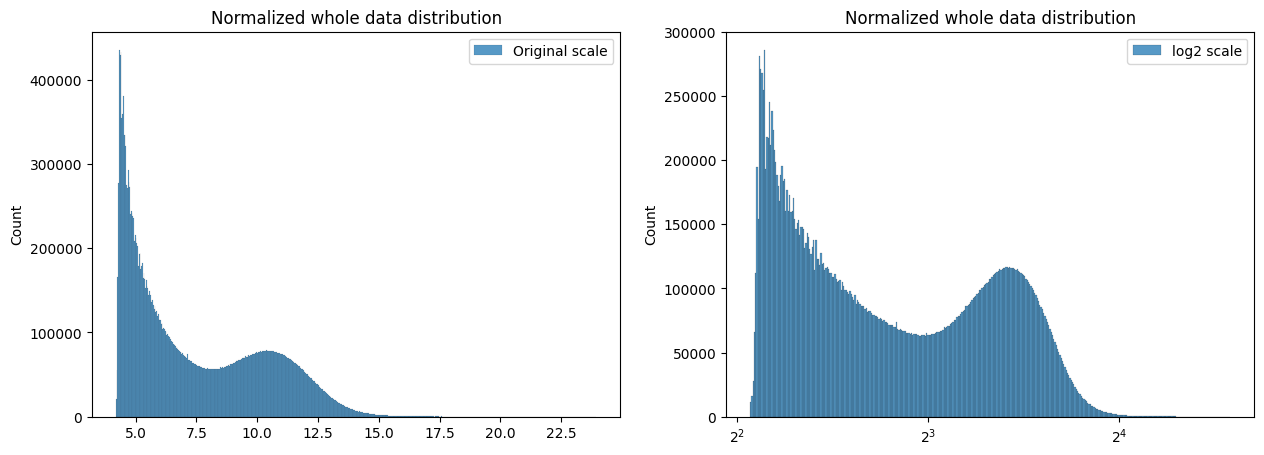

In [8]:
_, axs = plt.subplots(1, 2, figsize=(15,5))

# Plot normalized data
sns.histplot(data=normalized_data_flat, label='Original scale', ax=axs[0])
axs[0].title.set_text('Normalized whole data distribution')
axs[0].legend()

# Plot log-transformed normalized data
sns.histplot(data=normalized_data_flat, label='log2 scale', ax=axs[1],
             log_scale=2)
axs[1].title.set_text('Normalized whole data distribution')
axs[1].legend()

plt.plot()

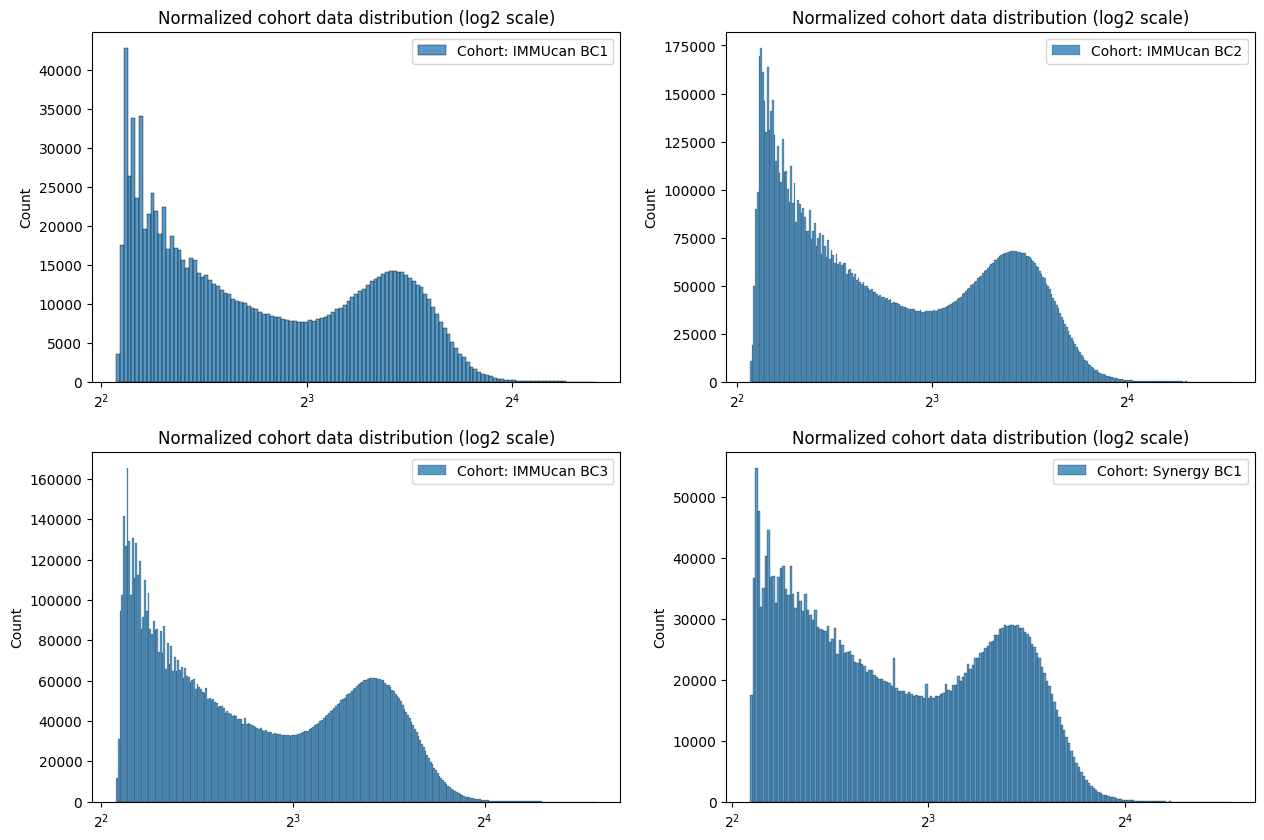

In [9]:
# Group patient_ids by cohort
info_grouped = info_table.groupby(['study', 'cohort'])['patient_id'].agg(list).reset_index()

# Plot log-normalized data distribution divided into cohorts
num_cohorts = len(info_grouped)

_, axs = plt.subplots(2, 2, figsize=(15,10))

for i in range(num_cohorts):
    cohort_to_plot = normalized_data[info_grouped['patient_id'][i]].to_numpy().flatten()
    study = info_grouped['study'][i]
    cohort = info_grouped['cohort'][i]
    sns.histplot(data=cohort_to_plot, label=f'Cohort: {study} {cohort}', ax=axs[i//2][i%2], log_scale=2)
    axs[i//2][i%2].title.set_text('Normalized cohort data distribution (log2 scale)')
    axs[i//2][i%2].legend()

# Plot data after preprocessing (excluded 0 values and genes with less than 500000 total counts)

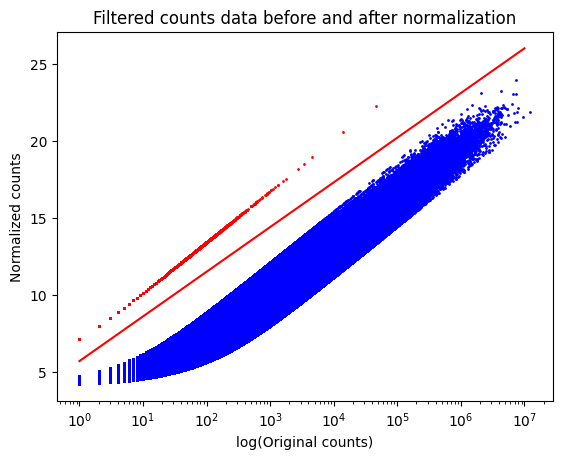

In [10]:
# Plot correlation of filtered counts and normalized counts
count_data_flat = count_matrix.to_numpy().flatten()

# Separate outliers
separator = (lambda x: 2.9*np.log10(x) + 5.7)
sep_x = np.logspace(0, 7, 100)
sep_y = separator(sep_x)
plt.plot(sep_x, sep_y, 'r', label='Separator')

counts_outliers = []
normalized_outliers = []
counts_normal = []
normalized_normal = []

# Plot outliers
for x, y in zip(count_data_flat, normalized_data_flat):
    if y > separator(x):
        counts_outliers.append(x)
        normalized_outliers.append(y)
    else:
        counts_normal.append(x)
        normalized_normal.append(y)

plt.plot(counts_outliers, normalized_outliers, 'ro', ms=1, label='Outliers')

# Plot normal data
plt.plot(counts_normal, normalized_normal, 'bo', ms=1, label='Normal data')

# plt.legend()
plt.xlabel('log(Original counts)')
plt.ylabel('Normalized counts')
plt.title('Filtered counts data before and after normalization')
plt.xscale('log')

# Data cleaning

In [11]:
# Find outliers in the dataframe
# (normalized_data > separator(count_matrix)).sum(axis=1).max()  # Max outlier number = 1
(normalized_data > separator(count_matrix)).sum(axis=0).sort_values(ascending=False)

SYNG_BC1_1541_02    20352
IMMU_BC1_0248           0
IMMU_BC1_0297           0
IMMU_BC1_0319           0
IMMU_BC1_0327           0
                    ...  
SYNG_BC1_1600           0
SYNG_BC1_1601           0
SYNG_BC1_1601_02        0
SYNG_BC1_1602           0
IMMU_BC1_0191           0
Length: 766, dtype: int64

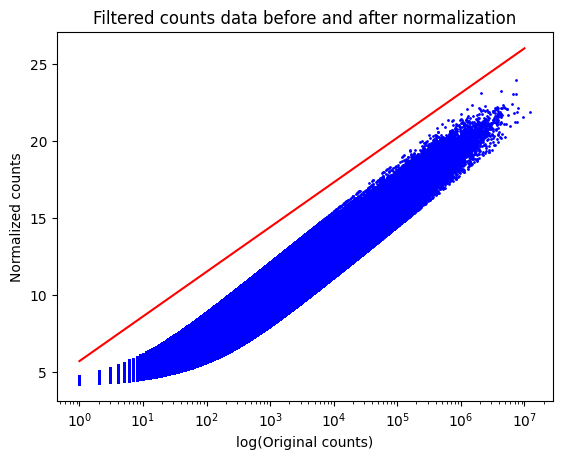

In [12]:
# Delete the outliers
outliers_to_drop = ['SYNG_BC1_1541_02']
count_data_cleaned = count_matrix.drop(outliers_to_drop, axis=1)
normalized_data_cleaned = normalized_data.drop(outliers_to_drop, axis=1)

# Plot correlation of filtered counts and normalized counts
normalized_data_flat = normalized_data_cleaned.to_numpy().flatten()
count_data_flat = count_data_cleaned.to_numpy().flatten()

# Separate outliers
separator = (lambda x: 2.9*np.log10(x) + 5.7)
sep_x = np.logspace(0, 7, 100)
sep_y = separator(sep_x)
plt.plot(sep_x, sep_y, 'r', label='Separator')

counts_outliers = []
normalized_outliers = []
counts_normal = []
normalized_normal = []

# Plot outliers
for x, y in zip(count_data_flat, normalized_data_flat):
    if y > separator(x) and ~np.isnan(y):
        counts_outliers.append(x)
        normalized_outliers.append(y)
    elif ~np.isnan(y):
        counts_normal.append(x)
        normalized_normal.append(y)

plt.plot(counts_outliers, normalized_outliers, 'ro', ms=1, label='Outliers')

# Plot normal data
plt.plot(counts_normal, normalized_normal, 'bo', ms=1, label='Normal data')

# plt.legend()
plt.xlabel('log(Original counts)')
plt.ylabel('Normalized counts')
plt.title('Filtered counts data before and after normalization')
plt.xscale('log')

In [47]:
counts_normal = np.array(counts_normal)
(counts_normal == 0).astype(int).sum()

np.int64(0)

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\patap\AppData\Local\Temp\ipykernel_1812\1207865235.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Smoothing with  $\sigma$ = %d" % sigma)


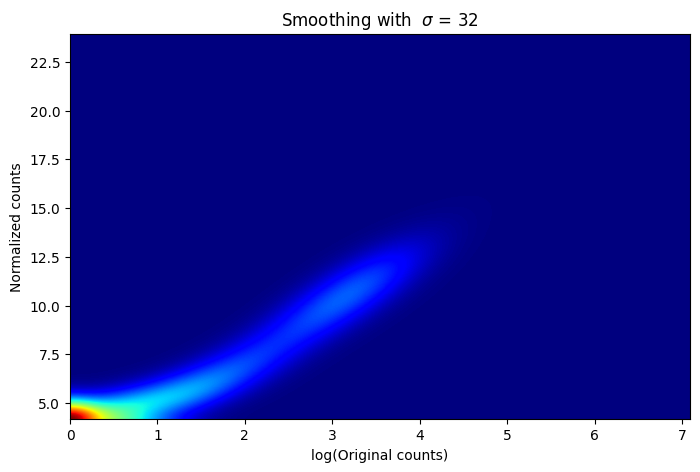

In [55]:
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(8,5))

def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


# Generate some test data
x = np.log10(counts_normal)
y = np.array(normalized_normal)

sigma = 32

img, extent = myplot(x, y, sigma, bins=1000)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet, aspect='auto')
# plt.scatter(x, y, s=1)
plt.title("Smoothing with  $\sigma$ = %d" % sigma)
plt.xlabel('log(Original counts)')
plt.ylabel('Normalized counts')
# plt.xscale('log')
plt.show()

In [57]:
normalized_data_cleaned.to_csv('brca_normalized_counts_pid.tsv', sep='\t')

[]

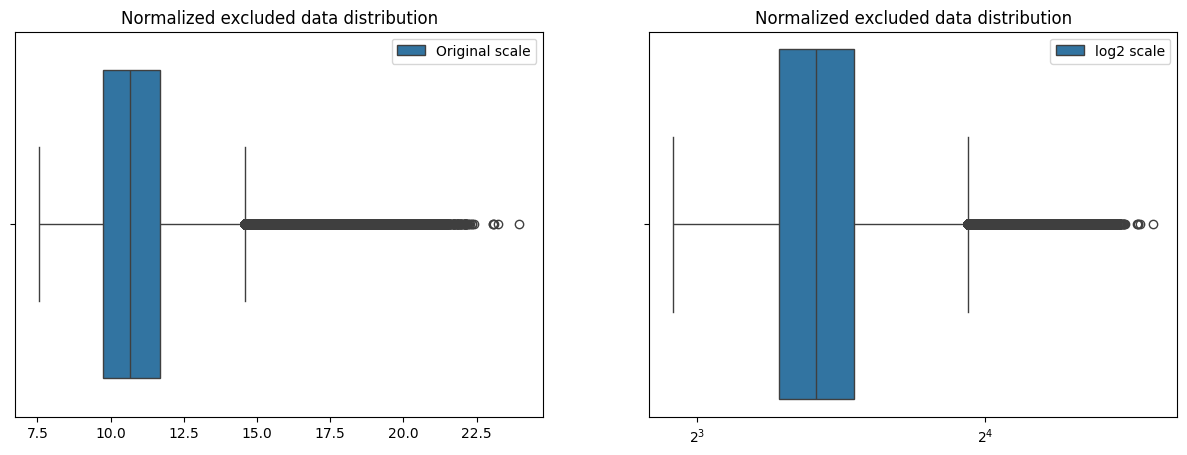

In [47]:
# Excluded data boxplot
_, axs = plt.subplots(1, 2, figsize=(15,5))

# Plot normalized data
sns.boxplot(x=normalized_data_flat, label='Original scale', ax=axs[0])
axs[0].title.set_text('Normalized excluded data distribution')
axs[0].legend()

# Plot log-transformed normalized data
sns.boxplot(x=normalized_data_flat, label='log2 scale', ax=axs[1],
             log_scale=2)
axs[1].title.set_text('Normalized excluded data distribution')
axs[1].legend()

plt.plot()